# Calculus Review

We'll go through the calculus you need to know to understand the theory behind machine learning algorithms.

### Table of Contents
1. [Basics](#basics)
2. [Taylor Series](#taylor)
3. [Multivariable Calculus](#multivar)

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

---
# Basics<a id='basics'></a>

### Simple Derivatives
- ${ \frac{d}{dx} x^n = nx^{n - 1} }$
- ${ \frac{d}{dx} sin(x) = cos(x) }$
- ${ \frac{d}{dx} cos(x) = -sin(x) }$
- ${ \frac{d}{dx} e^x = e^x }$
- ${ \frac{d}{dx} ln^x = \frac{1}{x} }$

---
# Taylor Series<a id='taylor'></a>

A taylor series expansion is an infinite sum of $\leq n$-order derivatives used to approximate a mathematical function. Because it can be used to approximate any mathematical function with sums, you'll see its application in gradient descent - the primary learning algorithm for [neural networks](https://jeffchenchengyi.github.io/machine-learning/03-neural-networks/basics/math-of-nn.html) (universal function approximators).

The Taylor Series expansion to approximate the output of a function $f$ at point $x=a$ is given by:

$$
f(x) \vert_{x=a} \approx f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots, = \sum_{n=0} ^ {\infty} \frac {f^{(n)}(a)}{n!} (x-a)^{n}
$$

When $a=0$, we get a special case of the Taylor series called the Maclaurin Series:

$$
f(x) \vert_{x=0} \approx \sum_{n=0} ^ {\infty} \frac {f^{(n)}(0)}{n!} x^{n}
$$

How do we use a Taylor Series / Maclaurin Series Expansion to approximate the output of a function?
1. Identify a function to resemble the operation on the number in question.
2. Choose $a$ to be a number that makes $f(a)$ easy to compute.
3. Select $x$ to make $f(x)$ the number being approximated.

Essentially, the goal here is that we want to use the Taylor Series Expansion to approximate an entire function $f(x)$ using just the output at $x=a$ (which we hope is easily computable). Once we have the output at $x=a$, adding more derivatives means we are adding more information about the **neighbourhood** around that point $x=a$ - the 1st order derivative gives information about the gradient at that point, the 2nd derivative gives information about the curvature (up or down) at that point. Adding more derivatives to $\infty$ will allow us to approximate the entire function at any point $x$ because we've incorporated an "infinite amount of information" about the function and thus capturing the whole function. 

However, there are caveats to this, since there's often a limit to how many times a specific function can be differentiated, meaning that there's a theoretical limit as to how accurate we can approximate our taylor series expansion to fit a function. 

Below, we'll write 2 python functions to see how close we get to the math library's implementation of $e^x$  and $cos(x)$, varying the number of derivatives we include. In order to increase our precision to make our approximation as close as possible to the actual value, we increase the number of higher order derivatives we include in the expansion. Furthermore, we'll use the Maclaurin Series Expansion / Taylor Series Expansion of function centered at origin.

Some useful Maclaurin Series Expansions:

$$
\begin{aligned}
&{ {e^x} = \sum\limits_{n = 0}^\infty  {\frac{ {{x^n} }}{ {n!} }}  }={ 1 + x + {\frac{ {{x^2} }}{ {2!} }} }+{ {\frac{ {{x^3} }}{ {3!} }} +  \ldots} \\
&{\cos x = \sum\limits_{n = 0}^\infty  {\frac{ {{ {\left( { – 1} \right)}^n}{x^{2n} }} }{ {\left( {2n} \right)!} }} }={ 1 – {\frac{ {{x^2} }}{ {2!} }} }+{ {\frac{ {{x^4} }}{ {4!} }} }-{ {\frac{ {{x^6} }}{ {6!} }} +  \ldots } \\
&{\sin x = \sum\limits_{n = 0}^\infty  {\frac{ {{ {\left( { – 1} \right)}^n}{x^{2n + 1} }} }{ {\left( {2n + 1} \right)!} }}  }={ x – {\frac{ {{x^3} }}{ {3!} }} }+{ {\frac{ {{x^5} }}{ {5!} }} }-{ {\frac{ {{x^7} }}{ {7!} }} +  \ldots } \\
&{\cosh x = \sum\limits_{n = 0}^\infty  {\frac{ {{x^{2n} }} }{ {\left( {2n} \right)!} }}  }={ 1 + {\frac{ {{x^2} }}{ {2!} }} + {\frac{ {{x^4} }}{ {4!} }} }+{ {\frac{ {{x^6} }}{ {6!} }} +  \ldots } \\
&{\sinh x = \sum\limits_{n = 0}^\infty  {\frac{ {{x^{2n + 1} }} }{ {\left( {2n + 1} \right)!} }}  }={ x + {\frac{ {{x^3} }}{ {3!} }} }+{ {\frac{ {{x^5} }}{ {5!} }} }+{ {\frac{ {{x^7} }}{ {7!} }} +  \ldots } \\
\end{aligned}
$$

In [73]:
# Using Maclaurin Series Expansion to 
# approximate e^x and cos(x) to nth-order
# derivatives precision
e_x = lambda x, n_derivatives: np.sum(
    [float(x ** i) / math.factorial(i) for i in range(n_derivatives)]
)
cos_x = lambda x, n_derivatives: np.sum(
    [float((-1) ** i) * float(x ** (2*i)) / math.factorial(2*i) for i in range(n_derivatives)]
)

In [98]:
def compare_maclaurin_and_implementation(
    x_to_approx,
    maclaurin_expansion_func, 
    numpy_func,
    n_derivatives=100
):
    """
    Function:
    ---------
    Graphs the output of the maclaurin expansion version
    of the function and the numpy implementation as we add
    increasing order of derivatives to increase precision of 
    maclaurin expansion
    
    Input:
    ------
    x_to_approx: List of the points x to approximate over
    maclaurin_expansion_func: The maclaurin expansion 
                              approximation centered at x=0
    numpy_func: The numpy implementation of the function to be 
                approximated with maclaurin_expansion_func
    n_derivatives: number of higher order derivatives to add
    
    Output:
    -------
    Graphs comparing how well maclaurin expansion approximates 
    the numpy implementation as we increase the number of higher
    order derivatives added
    
    """
    fig, ax = plt.subplots(len(x_to_approx), 1)
    for idx, x in enumerate(x_to_approx):
        ax[idx].plot(*list(zip(*[(i, maclaurin_expansion_func(x, i)) for i in range(n_derivatives)])), label='Maclaurin Expansion', linestyle='--', marker='o', alpha=1)
        ax[idx].plot(*list(zip(*[(i, numpy_func(x)) for i in range(n_derivatives)])), label='Numpy Implementation', linestyle='--', marker='v', alpha=0.5)
        ax[idx].legend()
        ax[idx].set_xlabel('Number of Higher Order Derivatives Added')
        ax[idx].set_ylabel('Output')
        ax[idx].set_title('Approximating x = {}'.format(x))
        ax[idx].grid()
#     plt.suptitle('Approximating Functions using Maclaurin Series Expansion')
    plt.tight_layout()
    plt.show();

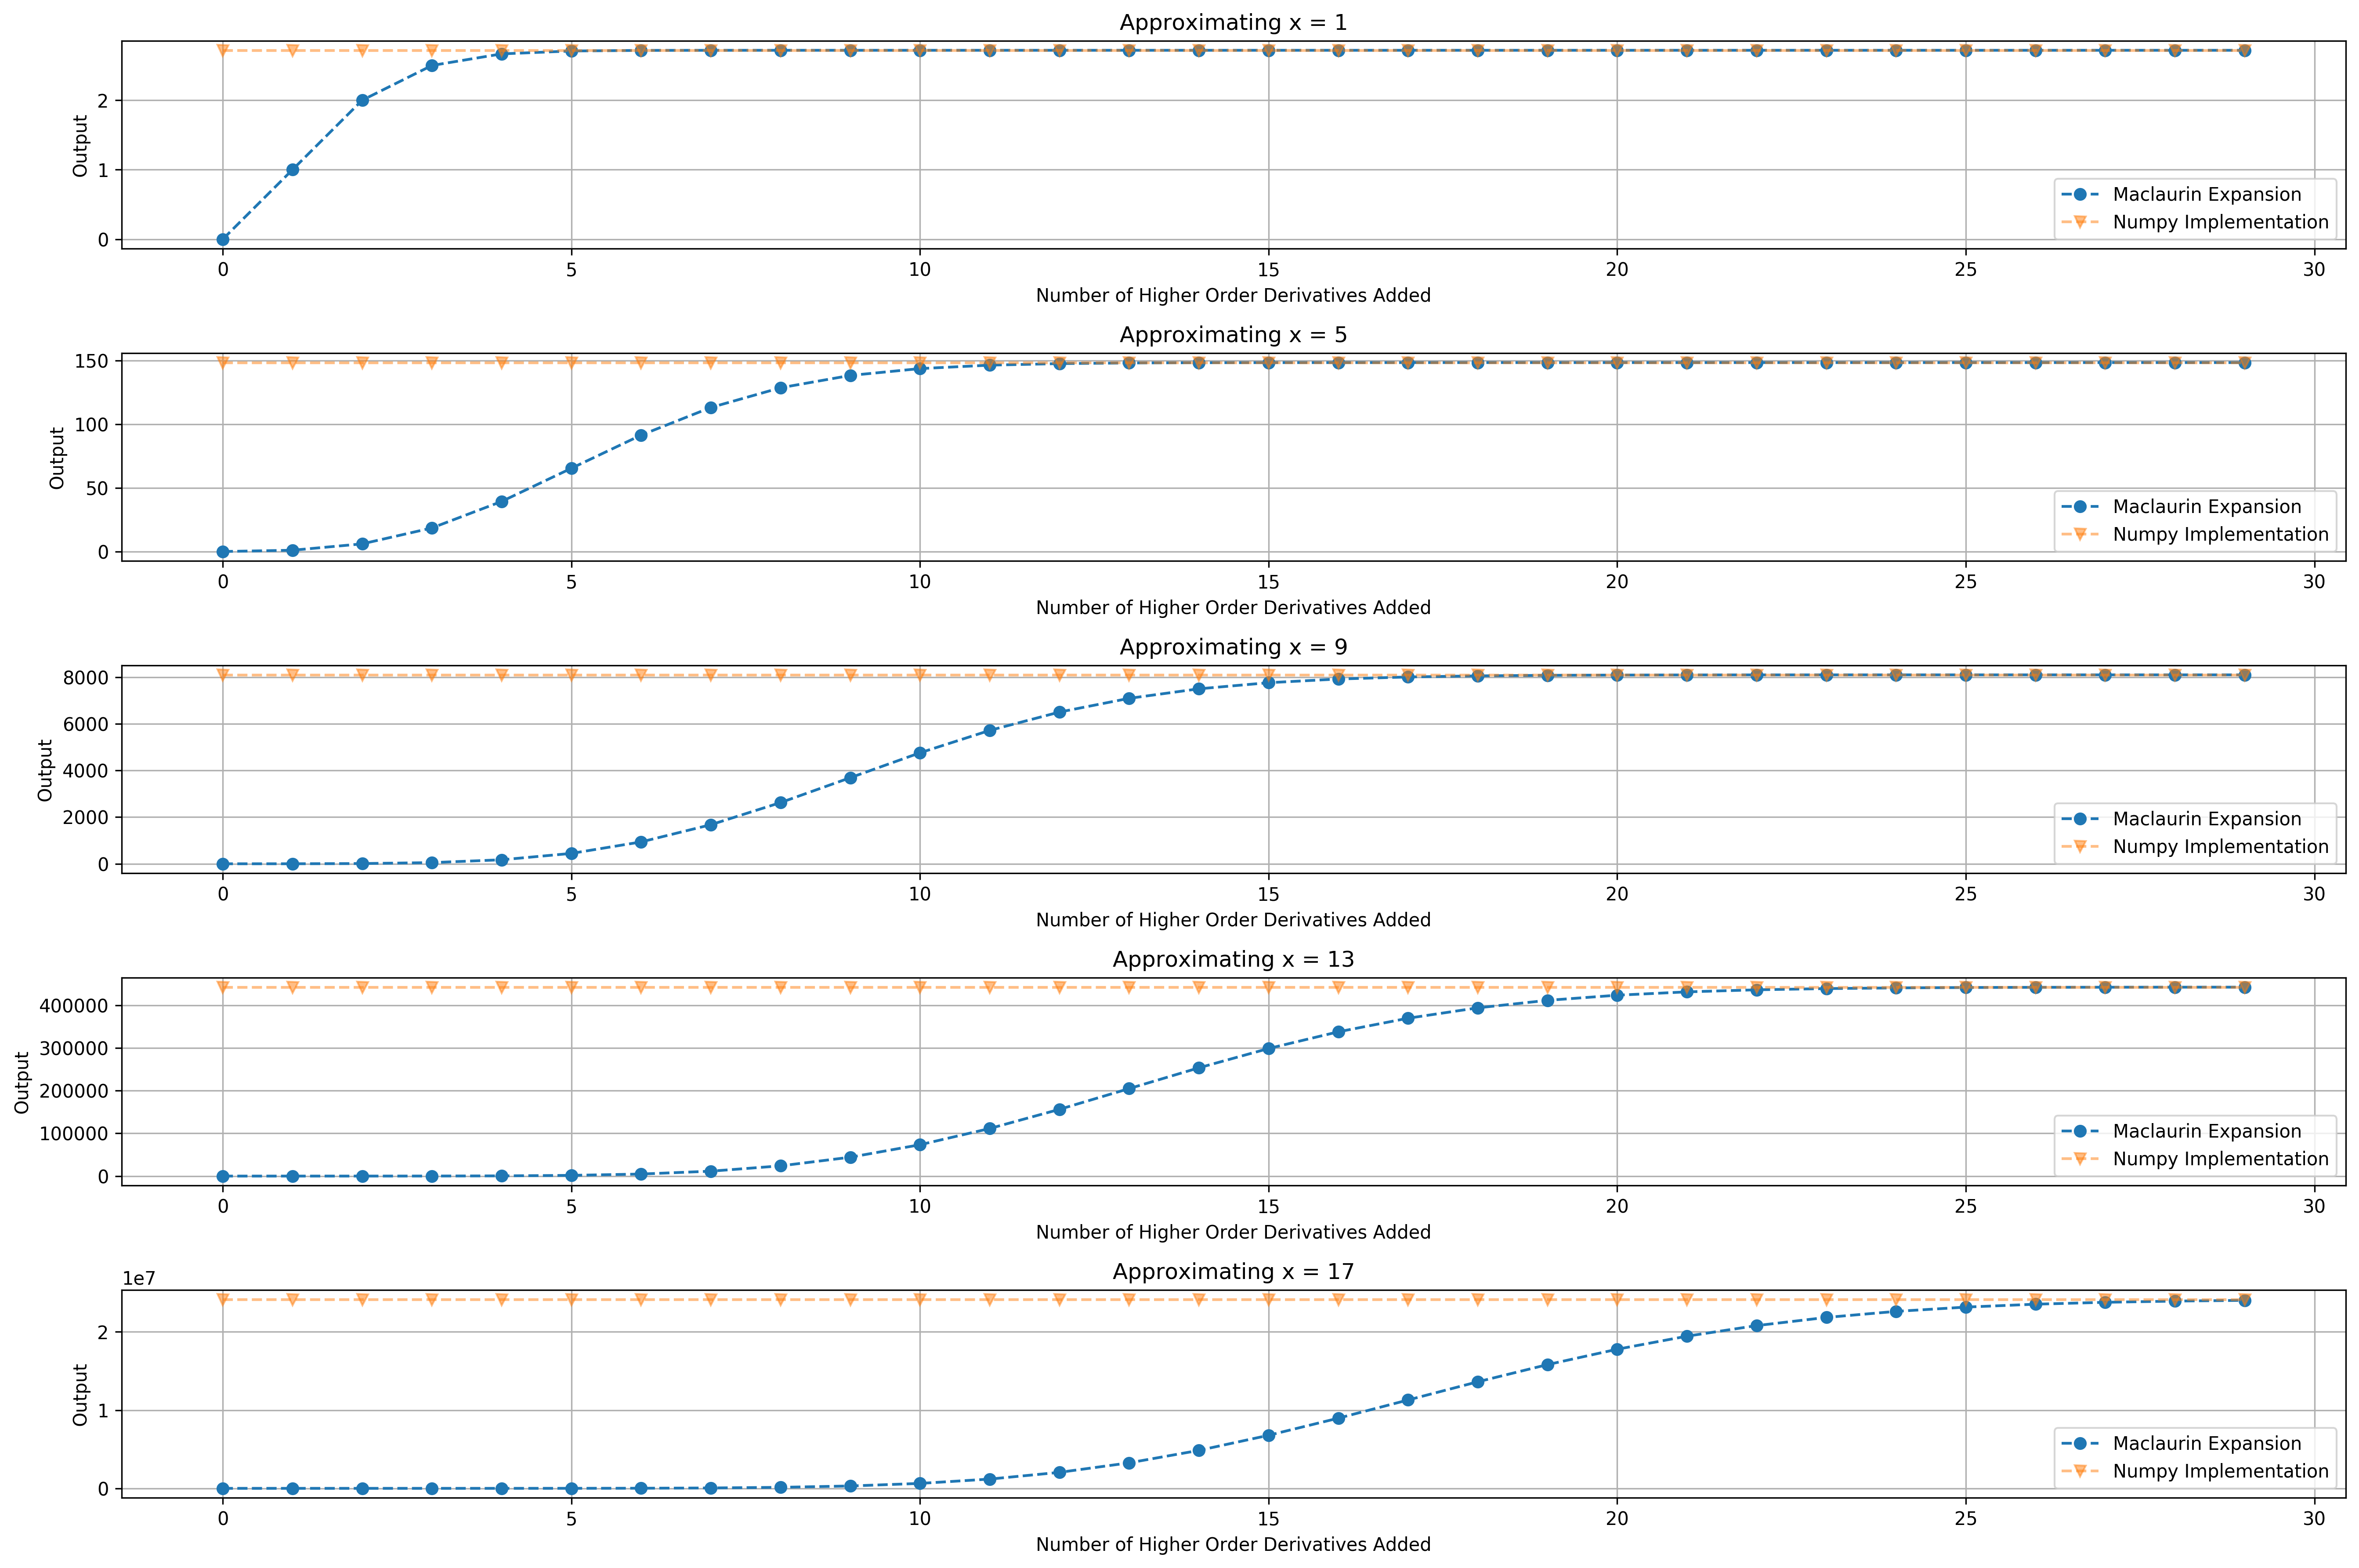

In [99]:
# Approximating e^x
compare_maclaurin_and_implementation(
    x_to_approx=[i for i in range(1, 20, 4)],
    maclaurin_expansion_func=e_x, 
    numpy_func=np.exp,
    n_derivatives=30
)

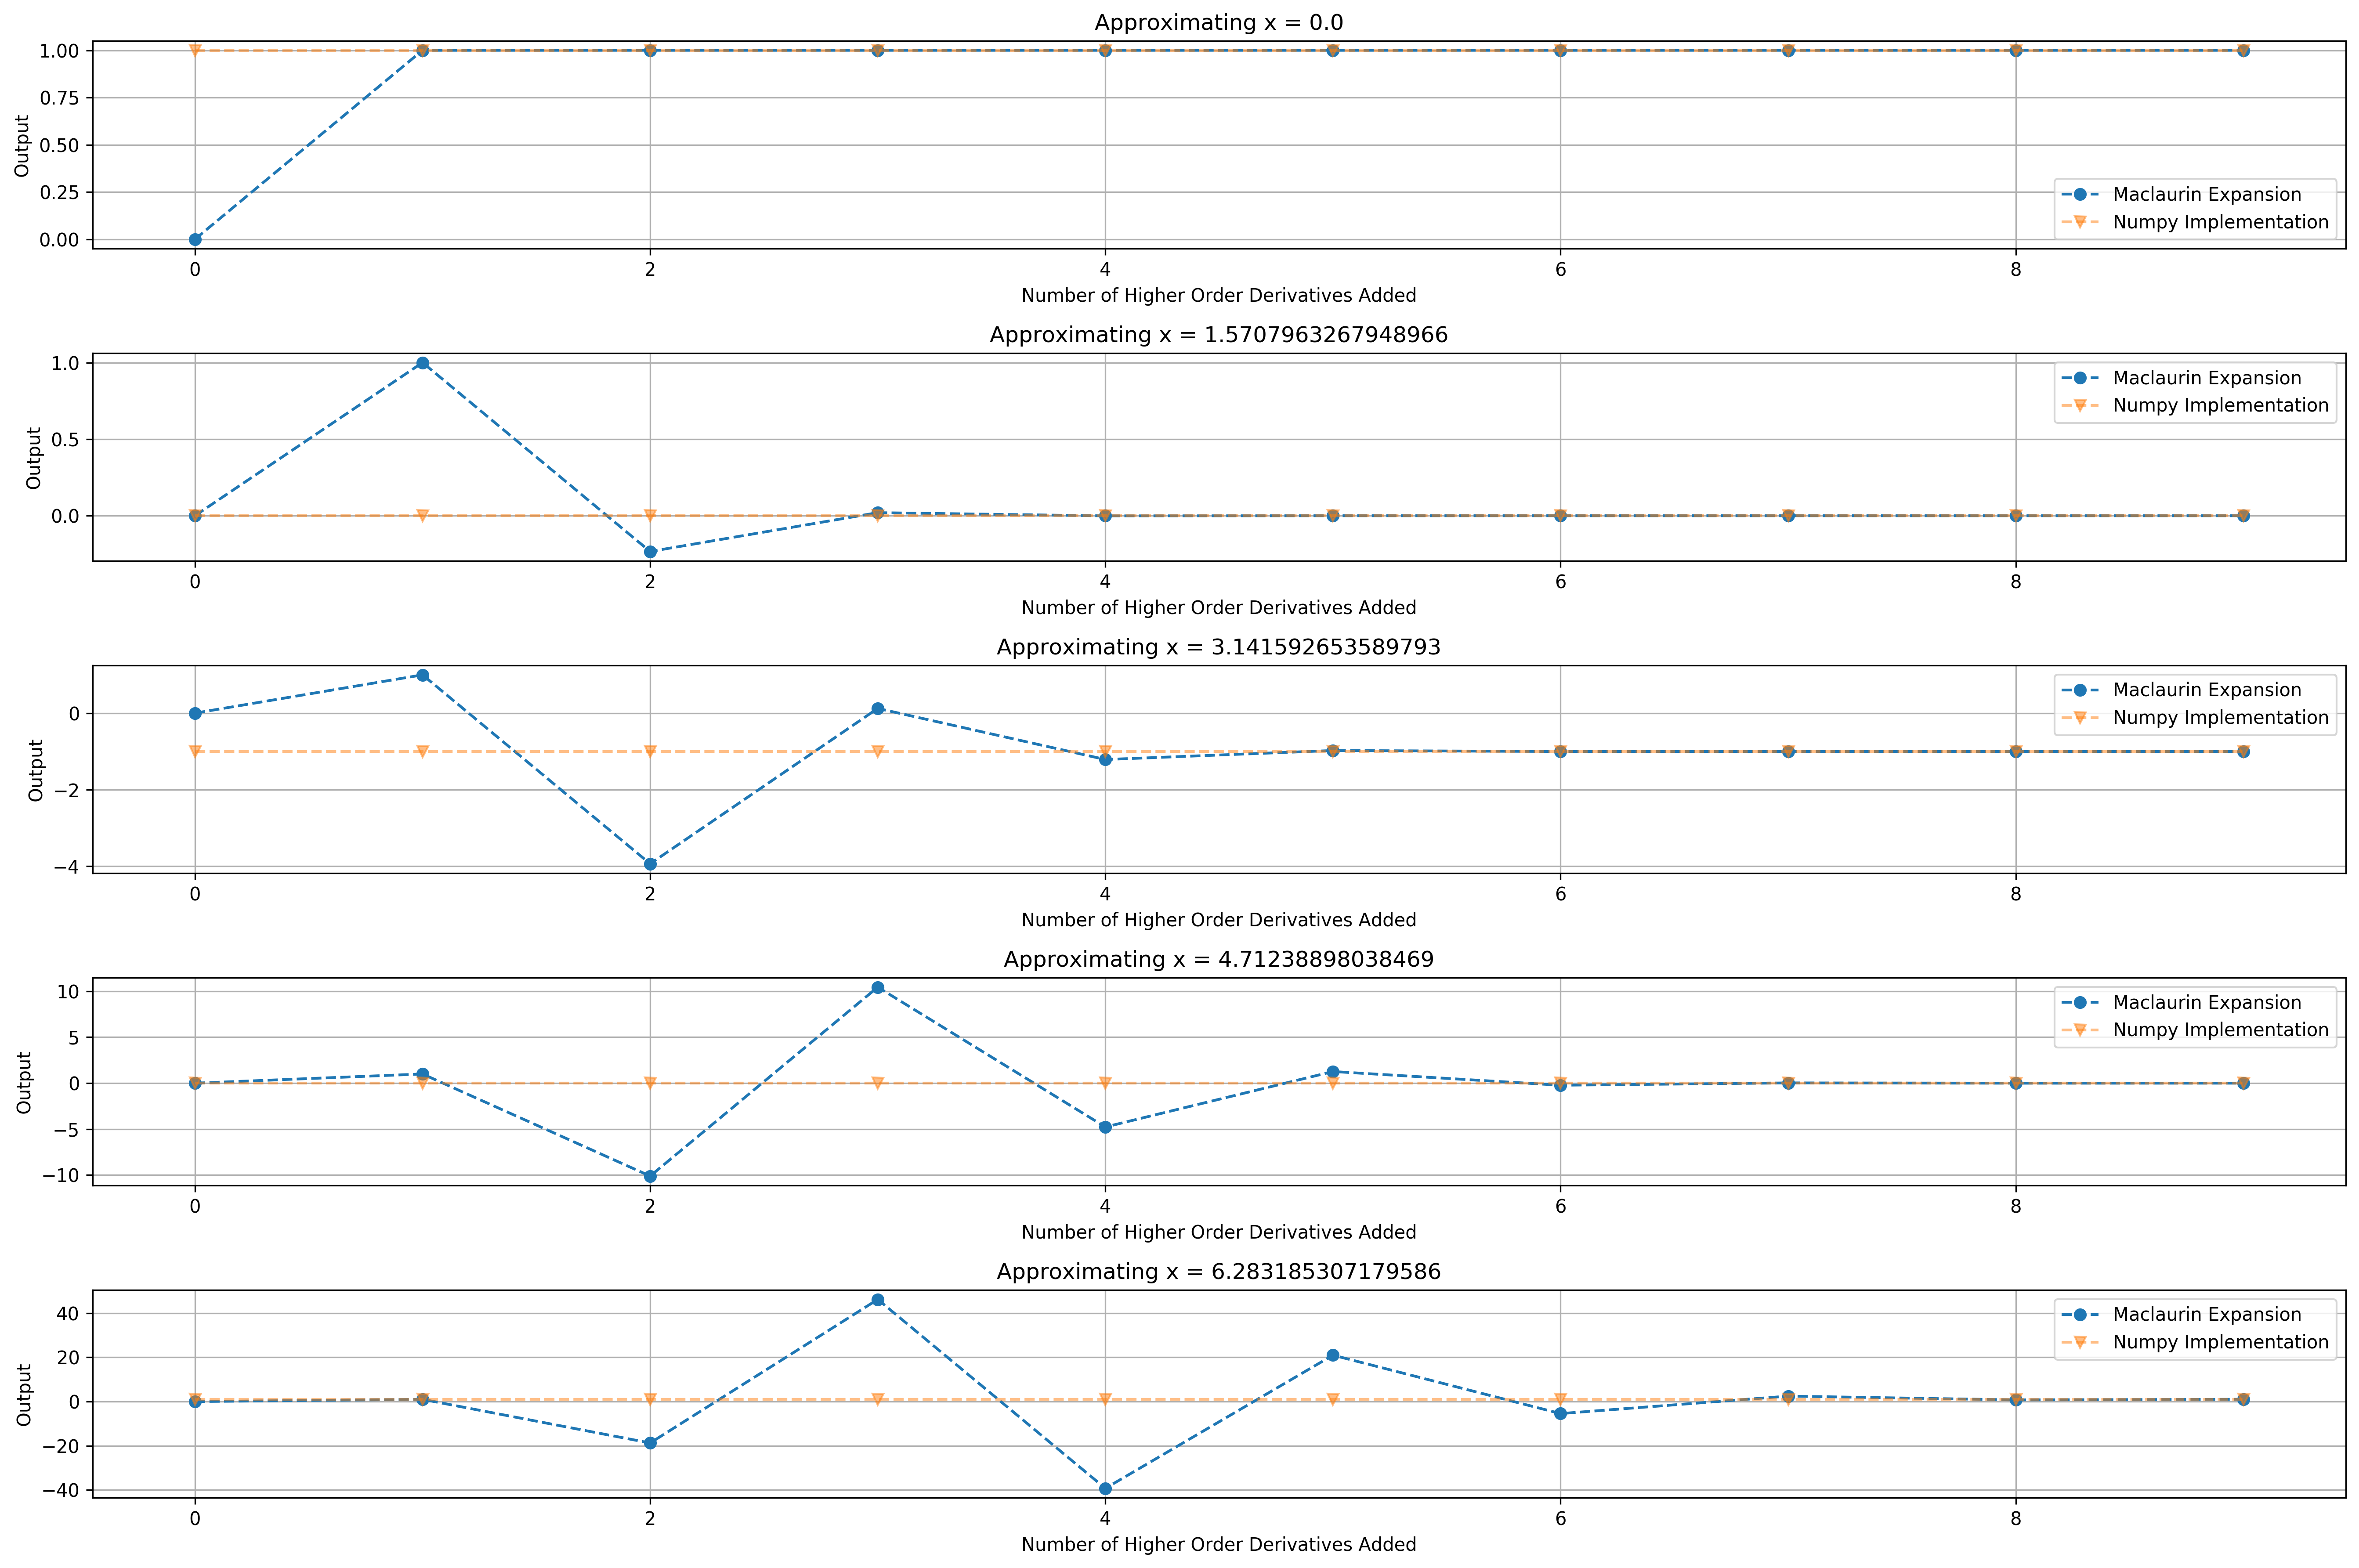

In [100]:
# Approximating cos(x)
compare_maclaurin_and_implementation(
    x_to_approx=np.arange(0, 2.5*np.pi, 0.5*np.pi),
    maclaurin_expansion_func=cos_x, 
    numpy_func=np.cos,
    n_derivatives=10
)

Recall that the `e_x` and `cos_x` maclaurin series expansions we wrote were centered at $a=0$, and from the two graphs above, we observe that as the distance $x-a$ where $a=0$ increases, the more higher-order derivative terms we need to approximate $e^x$ and $cos(x)$, though the maclaurin series expansion of $cos(x)$ oscillates alot more with increasing higher-order derivatives since the outputs of $cos(x)$ is oscillatory in nature.

---
# Multivariable Calculus<a id='multivar'></a>

---
## Resources:
- [Brilliant's notes on Taylor Approximation](https://brilliant.org/wiki/taylor-series-approximation/)
- [3Blue1Brown on Taylor Series](https://www.youtube.com/watch?v=3d6DsjIBzJ4)
- [Taylor Series in Python by Peter Kazarinoff](https://pythonforundergradengineers.com/creating-taylor-series-functions-with-python.html)
- [Taylor and Maclaurin Series @ Math24](https://www.math24.net/taylor-maclaurin-series/)